[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
<ipython-input-1-0bb6eaed5a72>:53: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=train_data, y='GENRE', order=train_data['GENRE'].value_counts().index, palette='viridis')


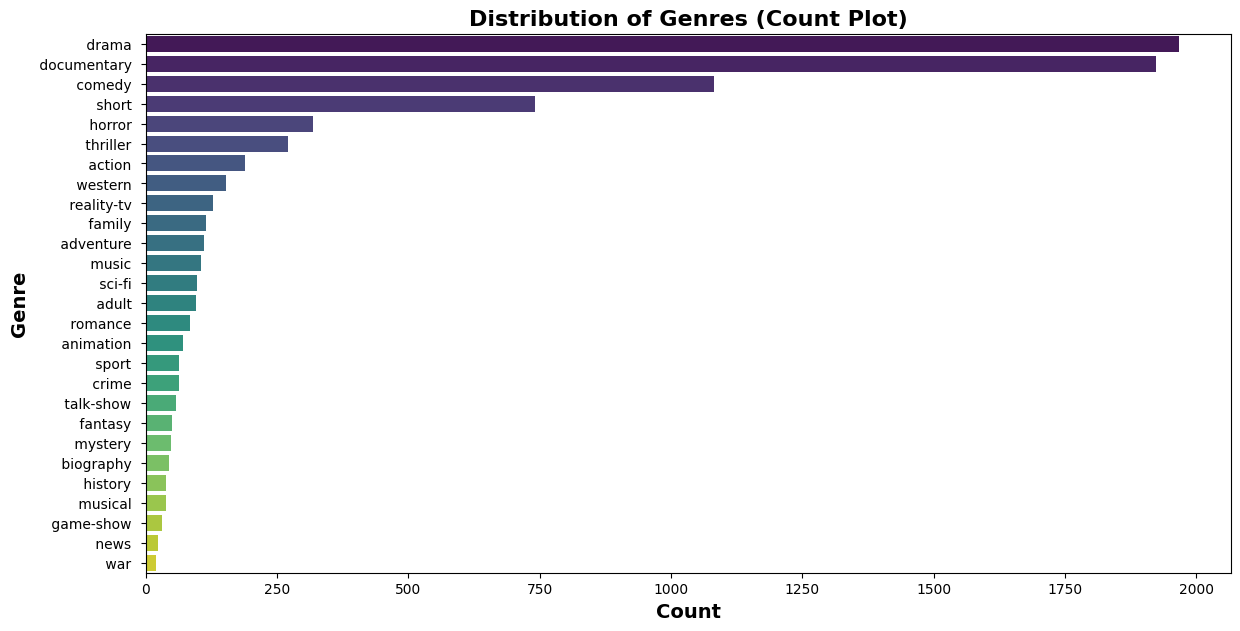

<ipython-input-1-0bb6eaed5a72>:62: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=counts.index, y=counts, palette='viridis')


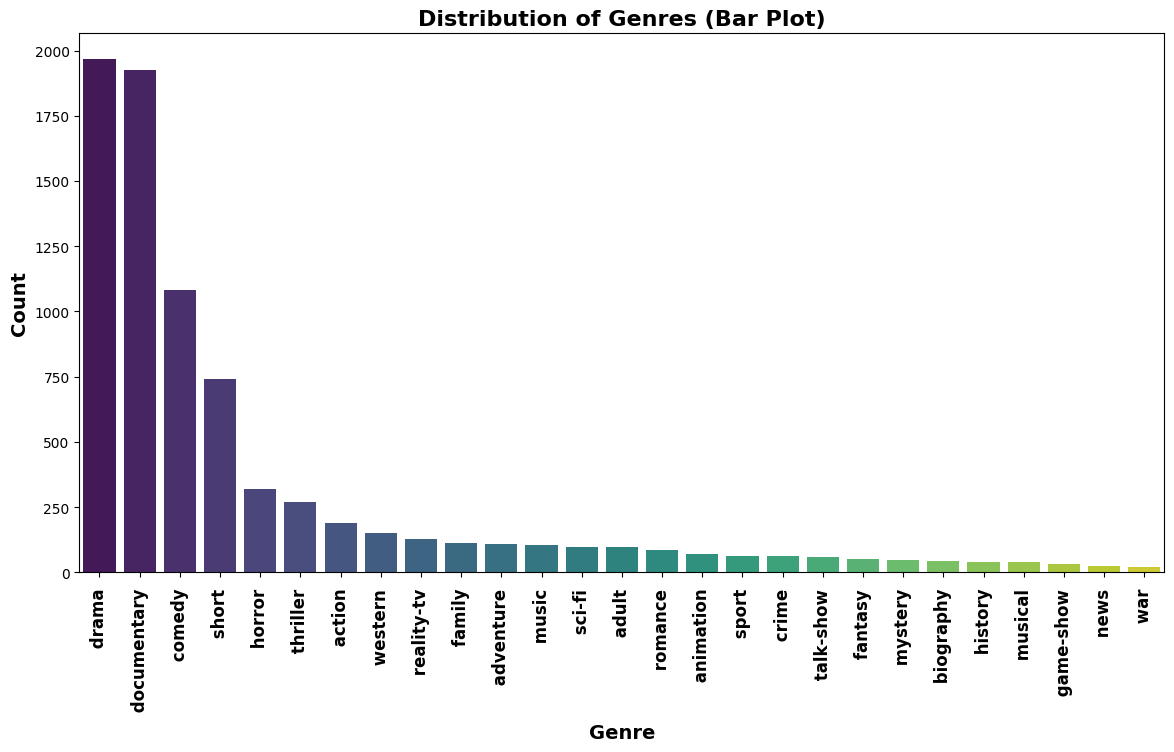

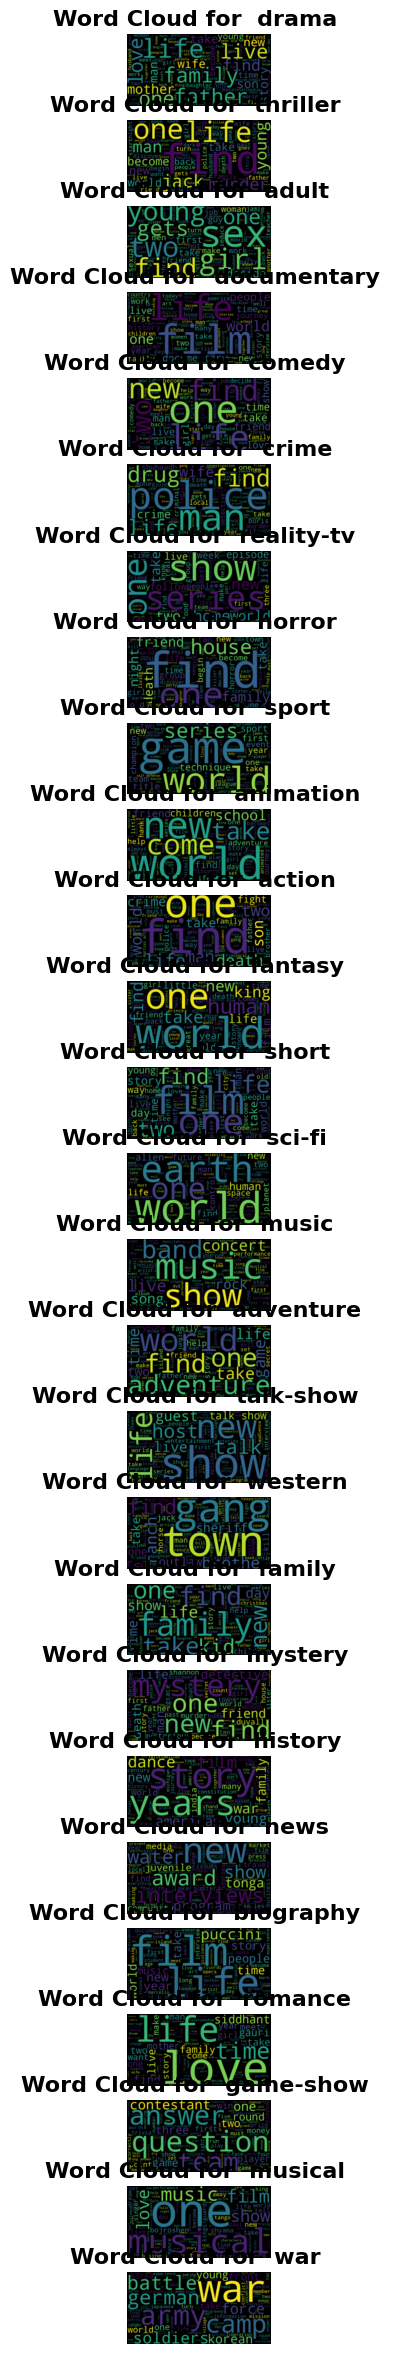

Accuracy: 0.3836477987421384
               precision    recall  f1-score   support

      action        0.00      0.00      0.00         6
       adult        0.00      0.00      0.00         2
   adventure        0.00      0.00      0.00         4
   animation        0.00      0.00      0.00         2
      comedy        0.33      0.24      0.28        21
       crime        0.00      0.00      0.00         2
 documentary        0.45      0.81      0.57        36
       drama        0.35      0.71      0.47        38
      family        0.00      0.00      0.00         9
   game-show        0.00      0.00      0.00         1
      horror        0.00      0.00      0.00         3
       music        0.00      0.00      0.00         3
     mystery        0.00      0.00      0.00         1
  reality-tv        0.00      0.00      0.00         1
     romance        0.00      0.00      0.00         1
      sci-fi        0.00      0.00      0.00         1
       short        0.00      0.00 

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


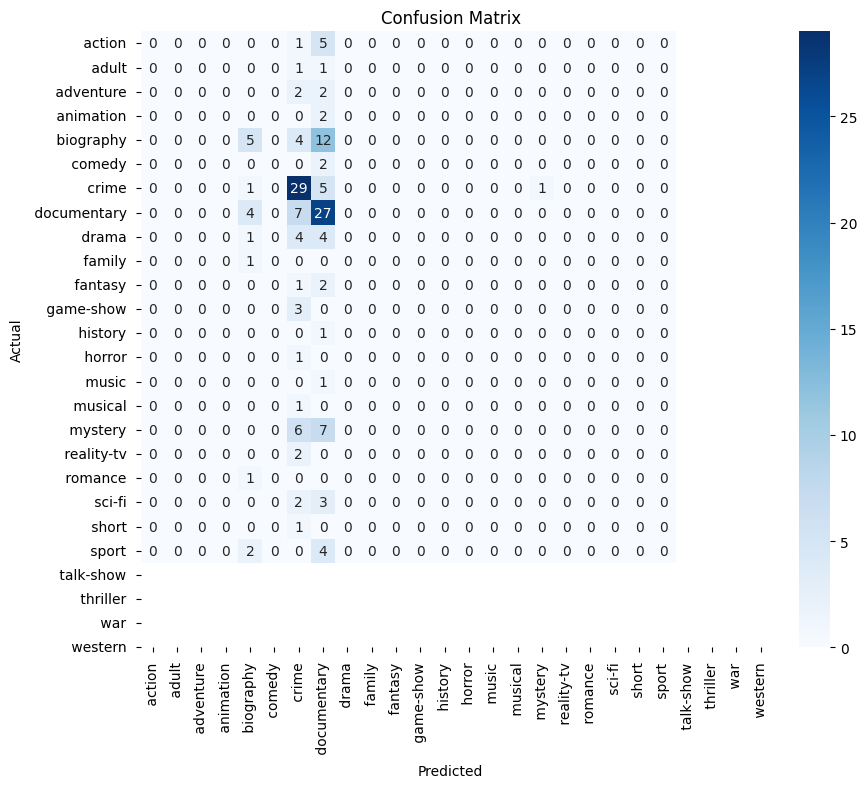

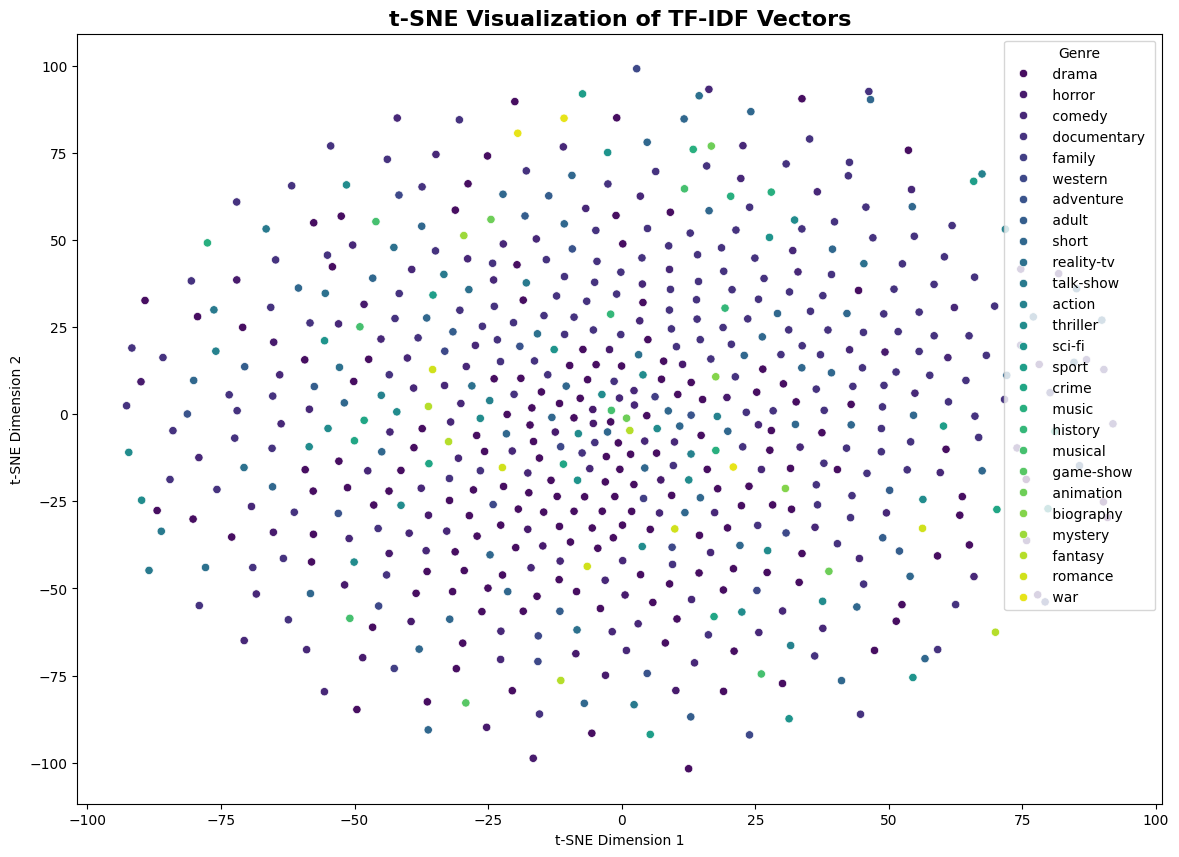

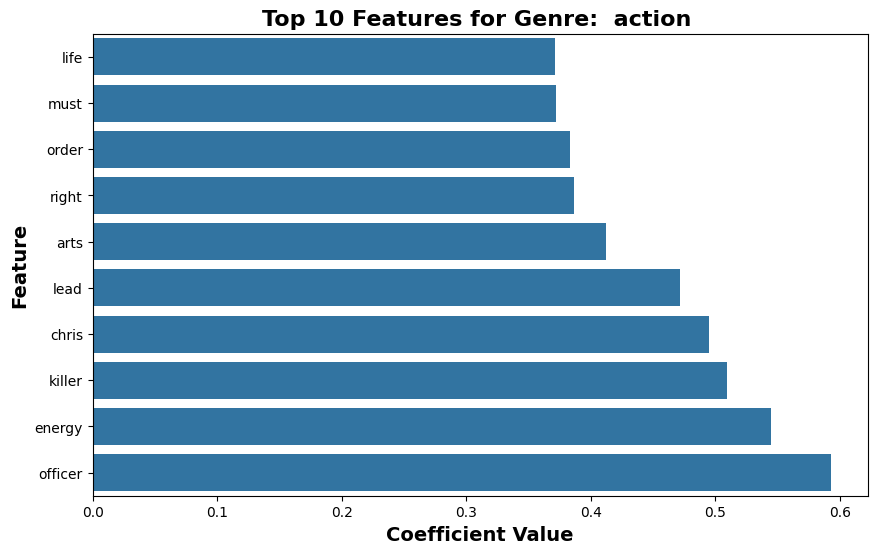

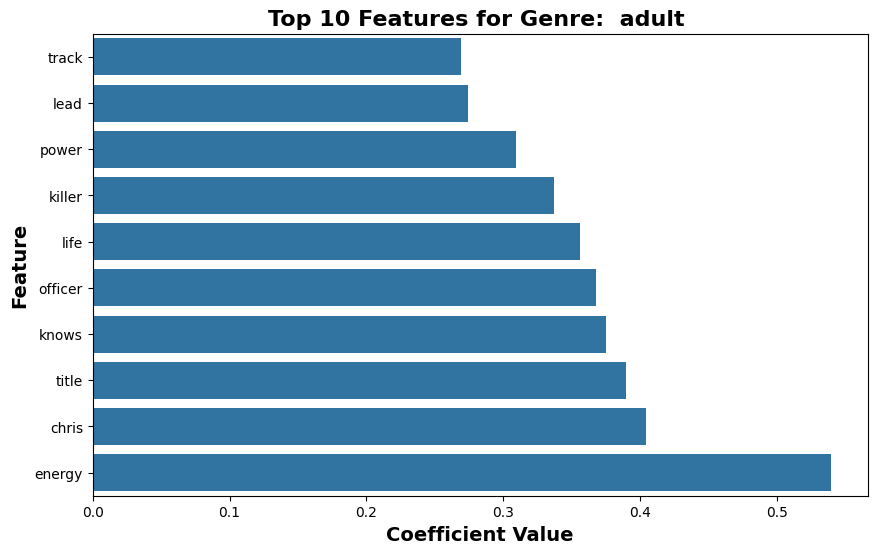

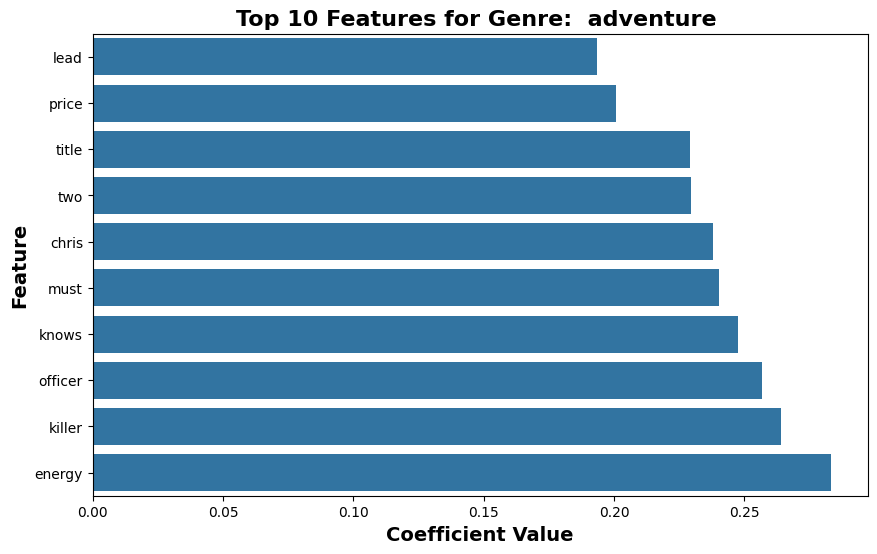

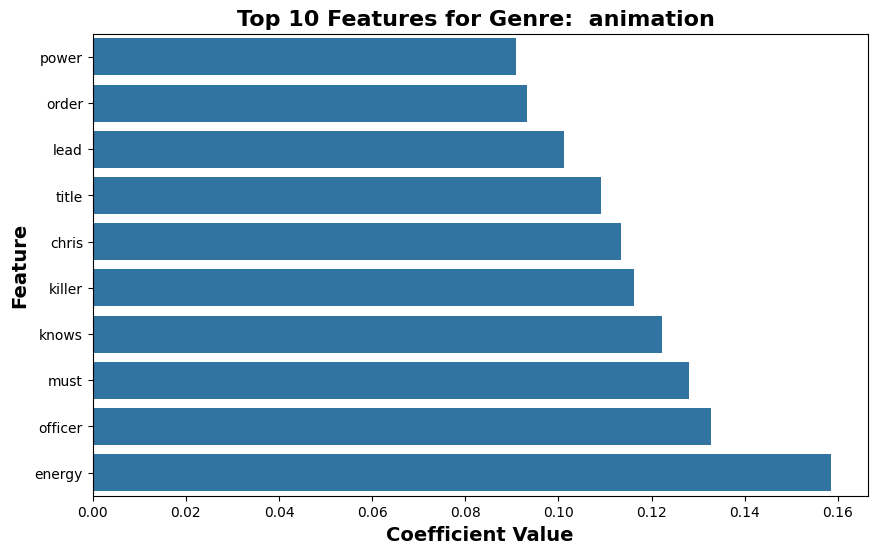

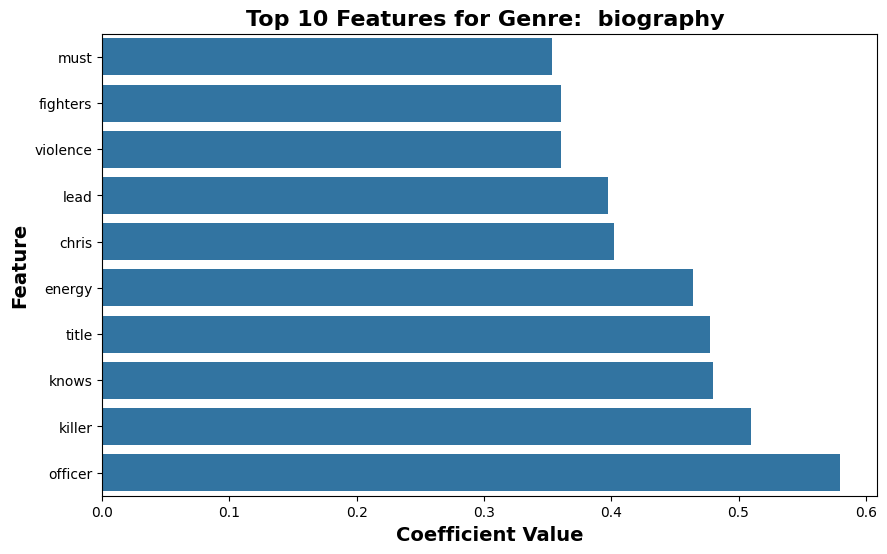

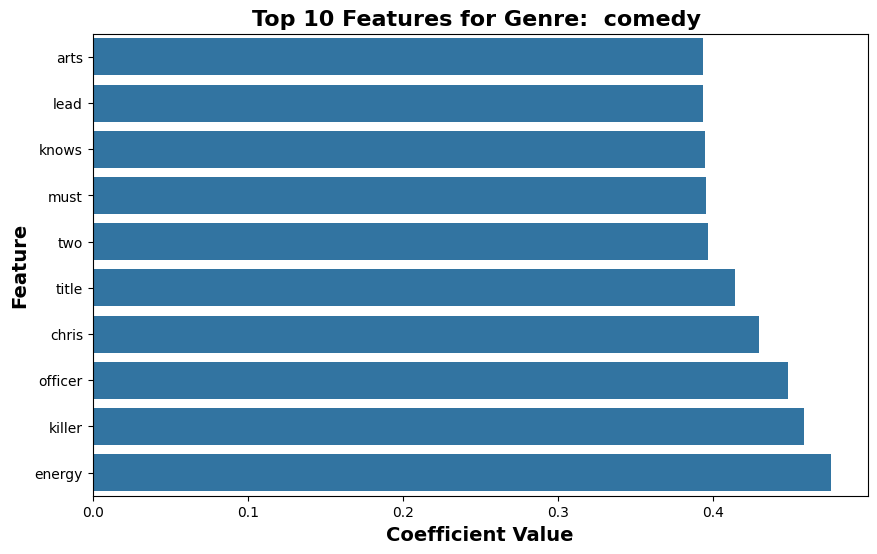

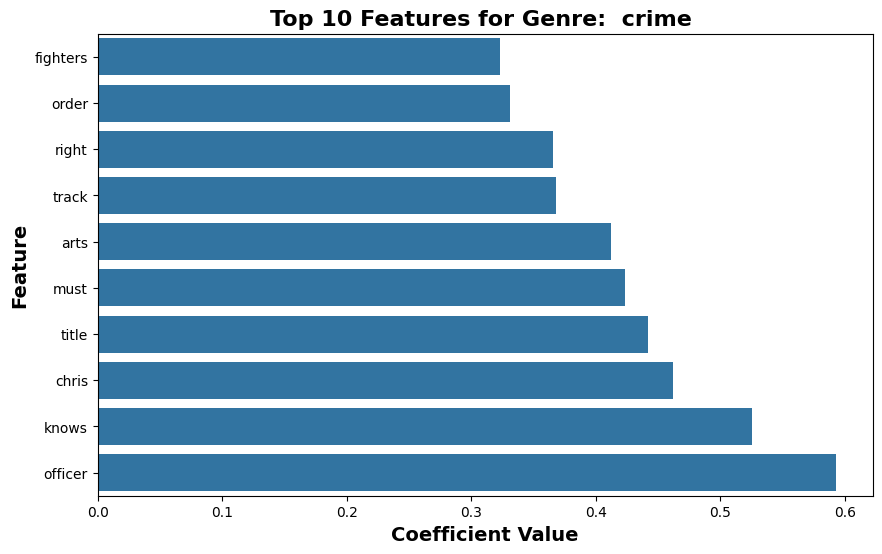

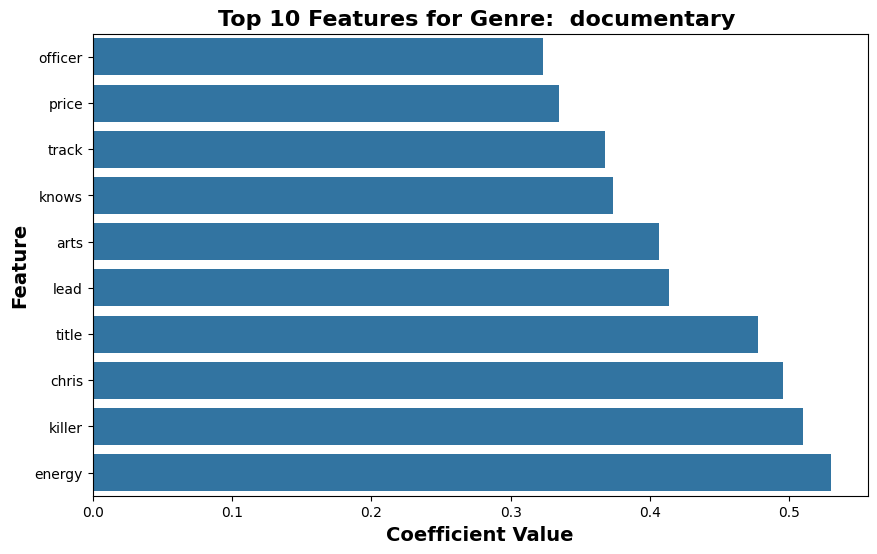

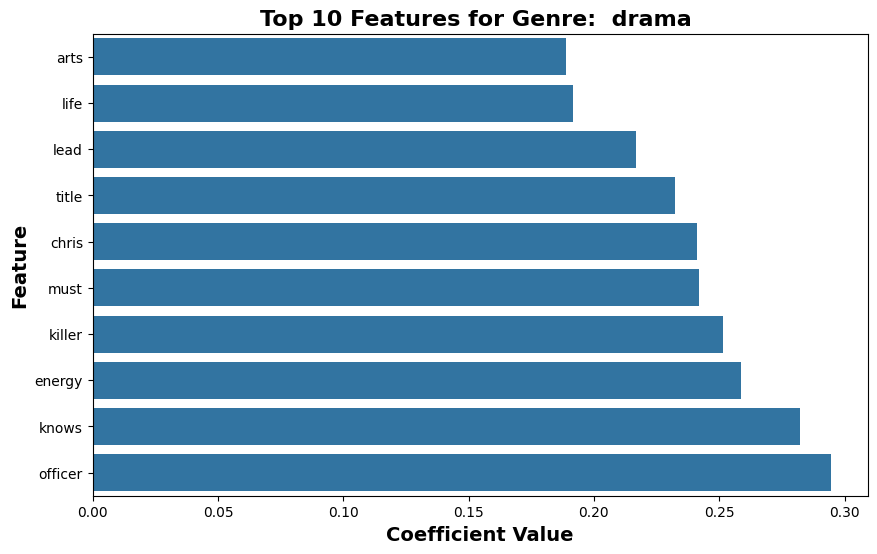

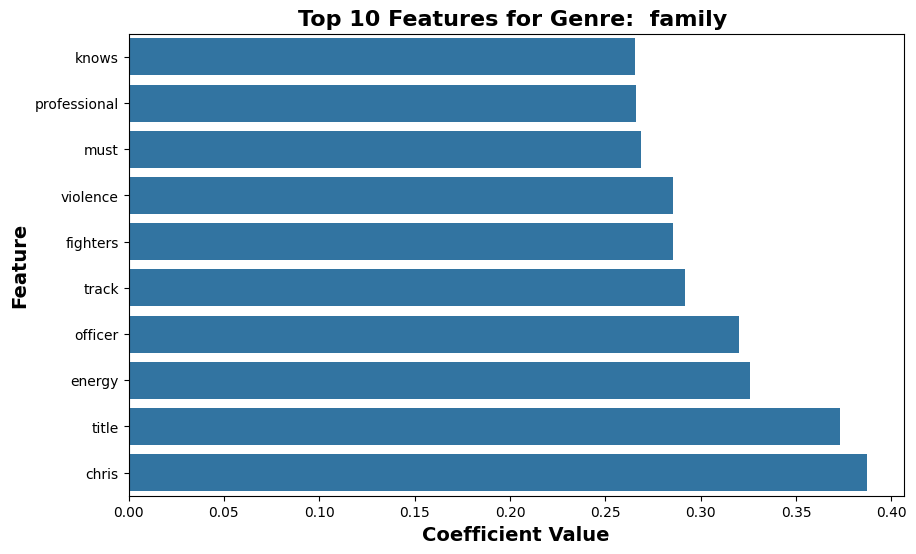

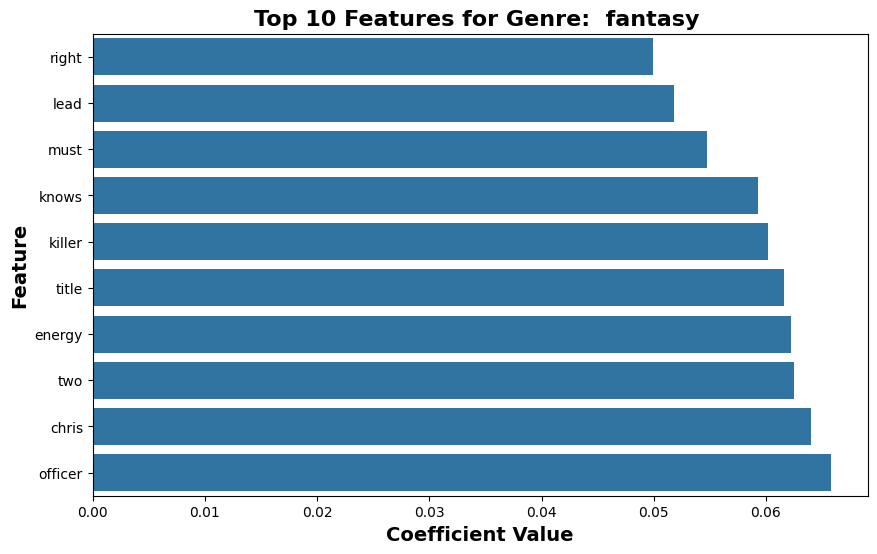

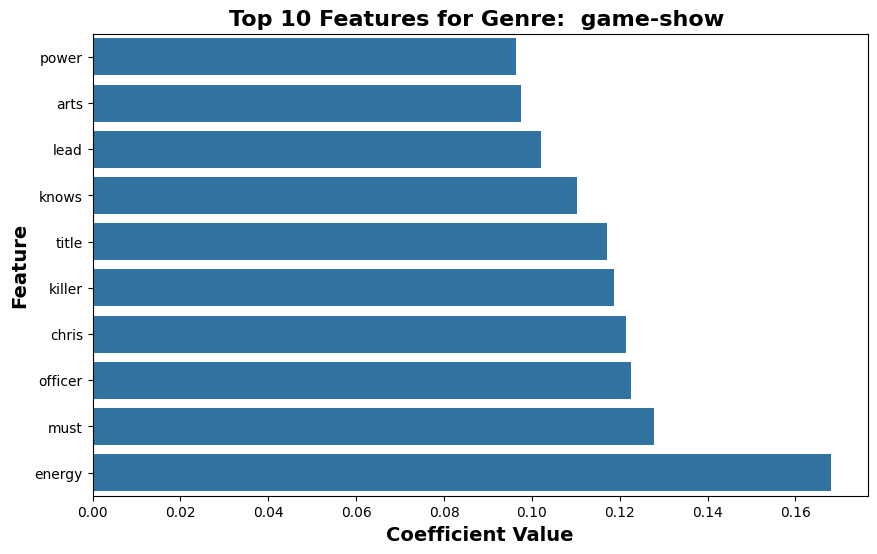

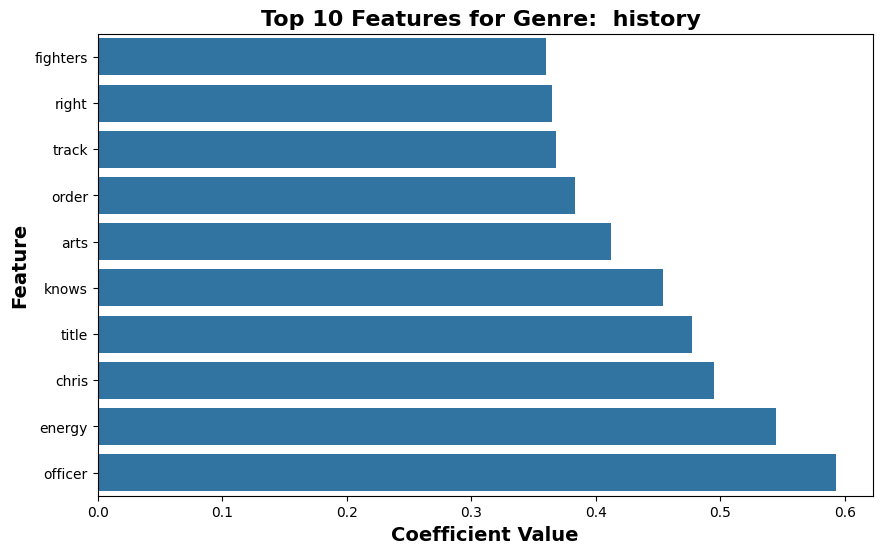

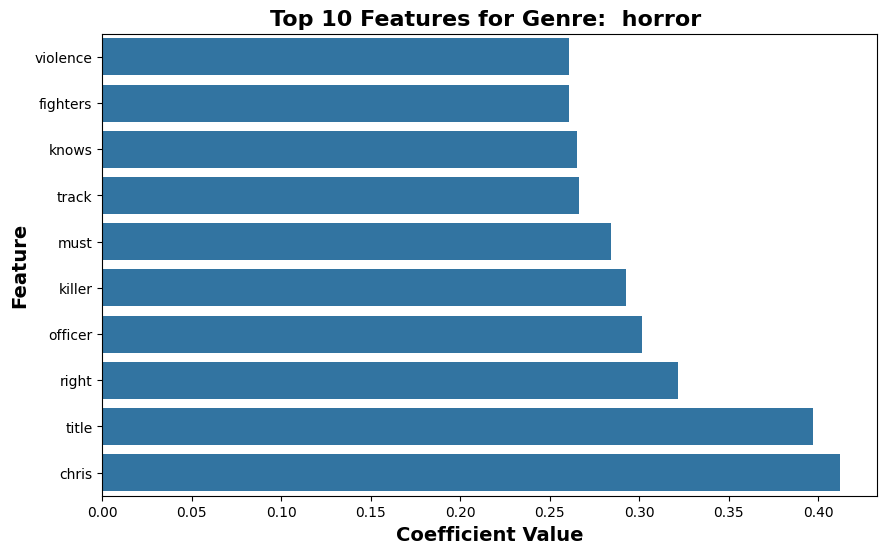

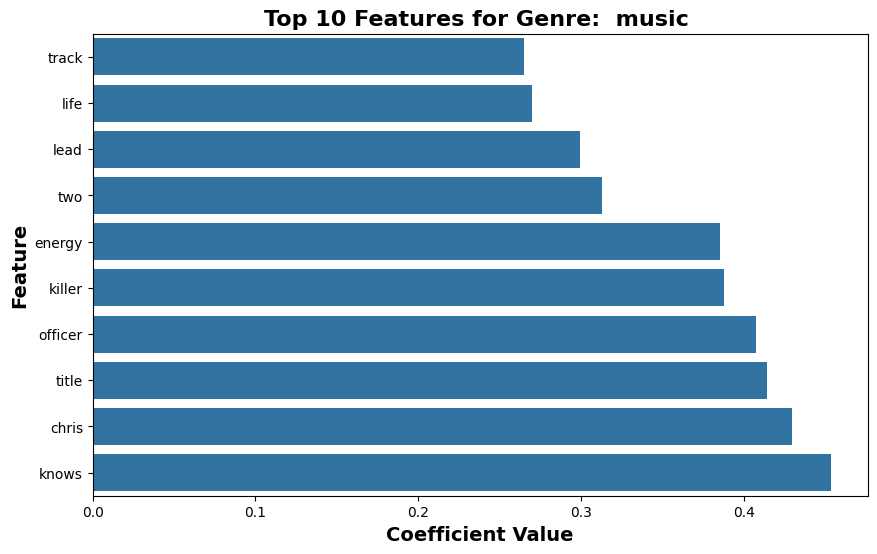

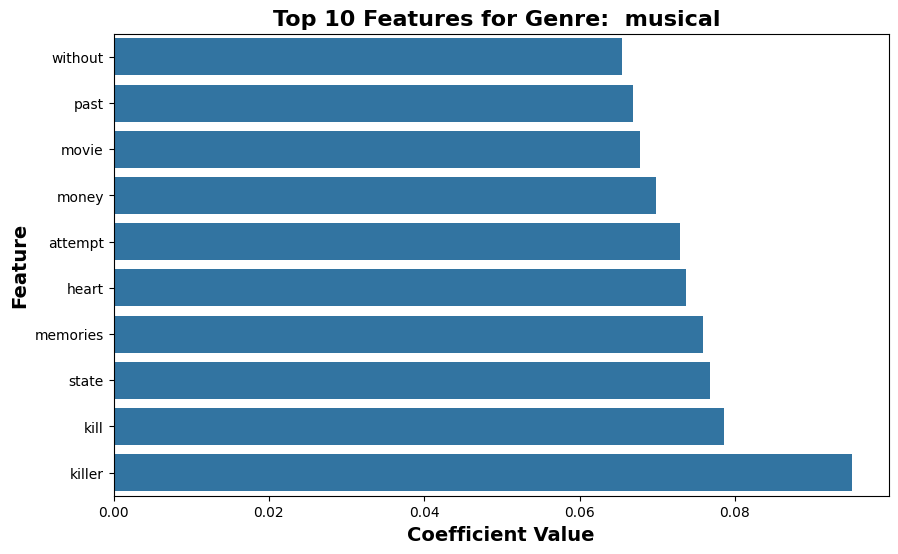

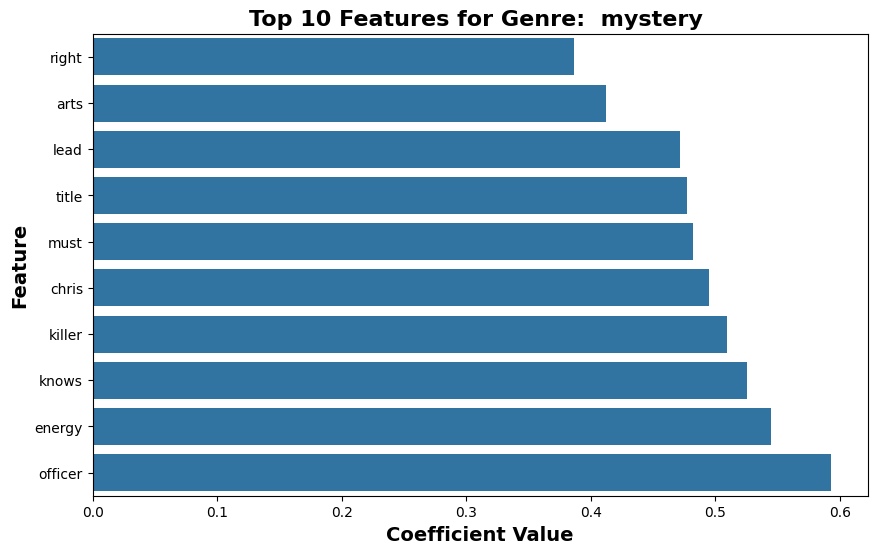

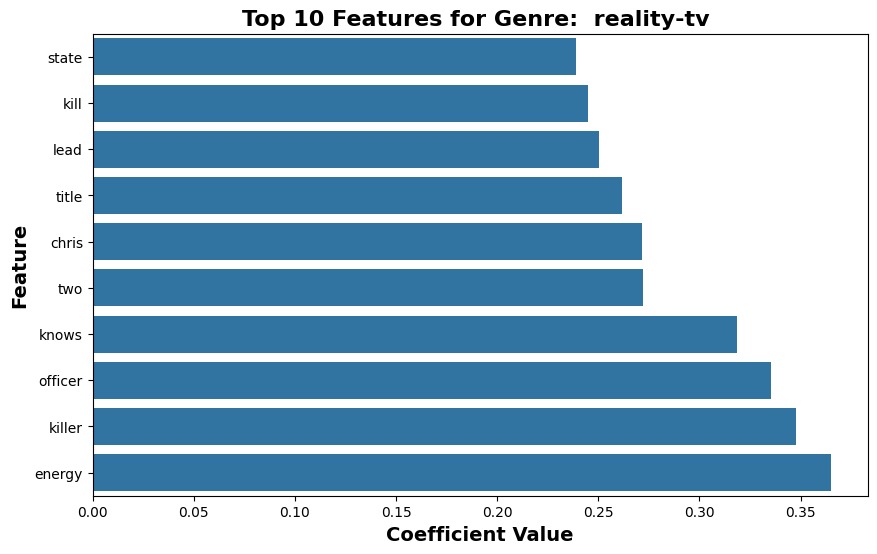

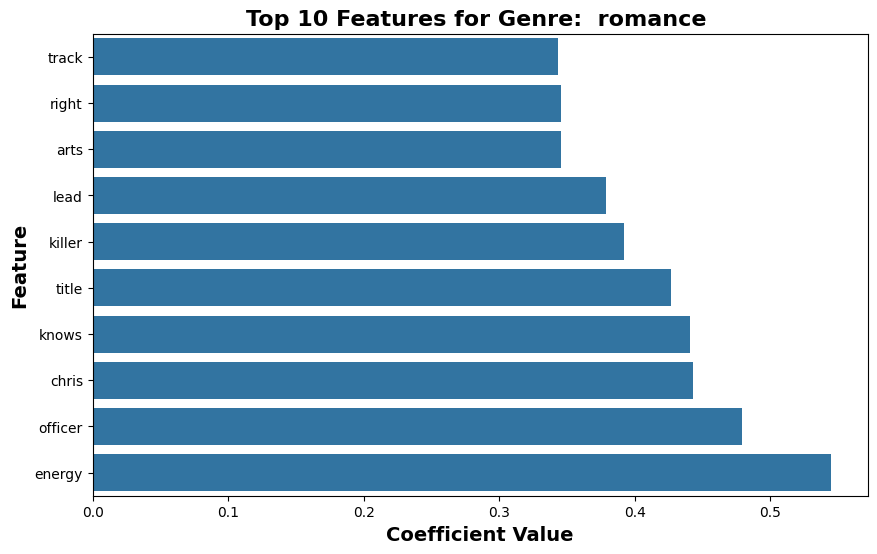

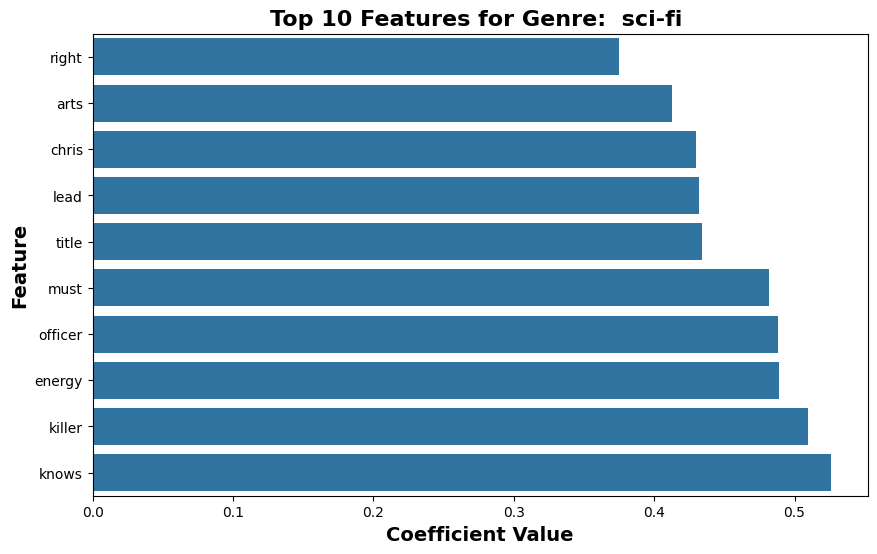

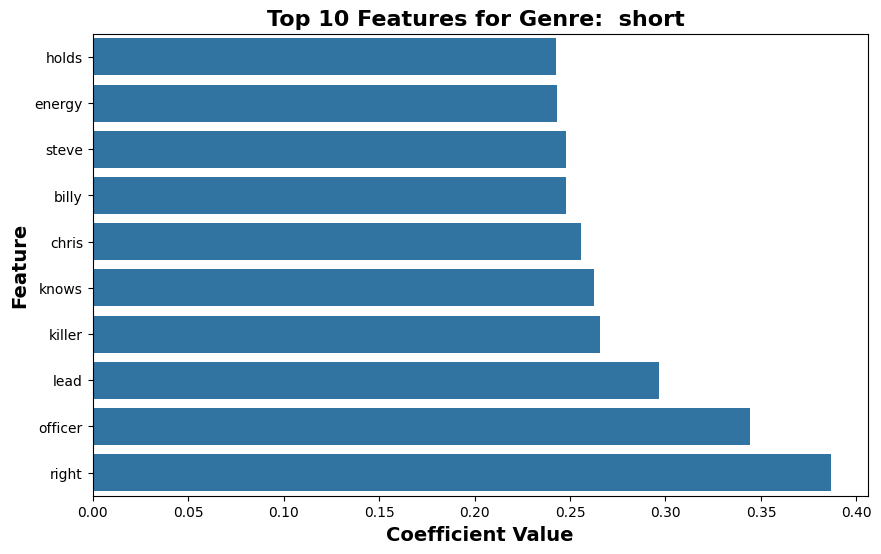

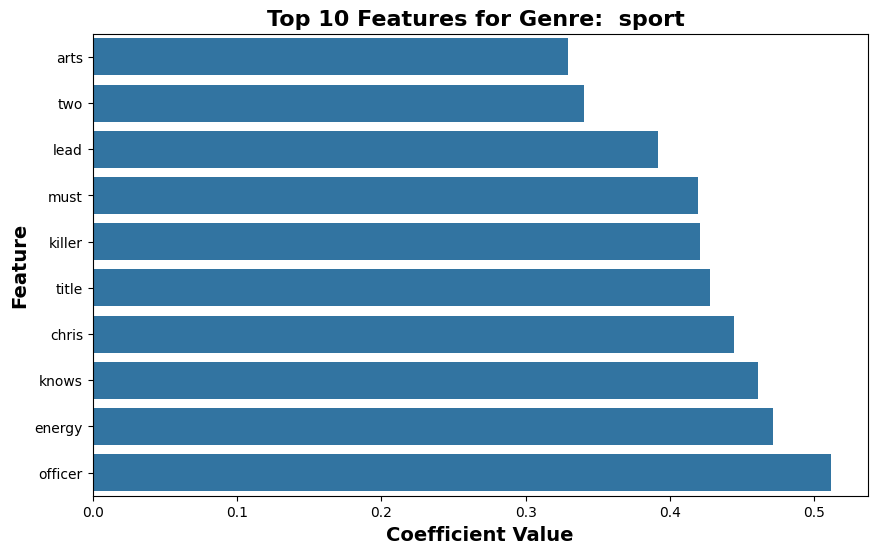

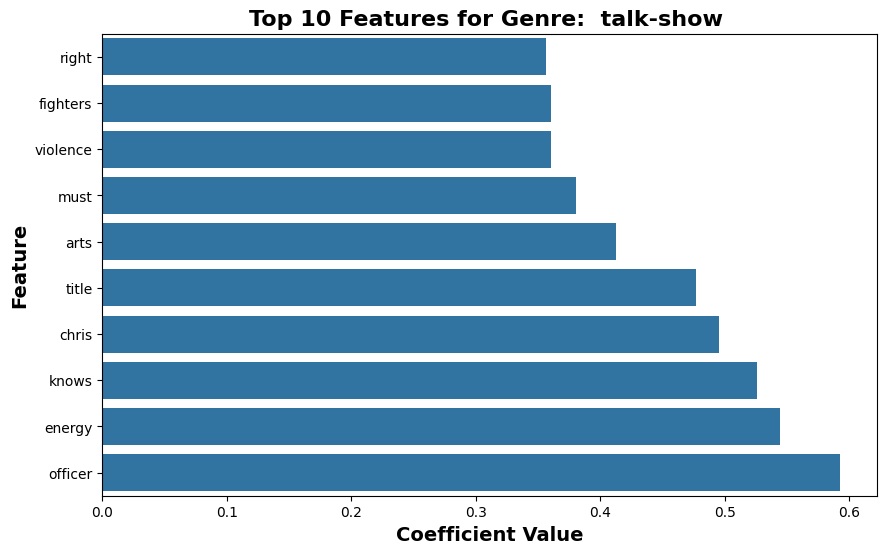

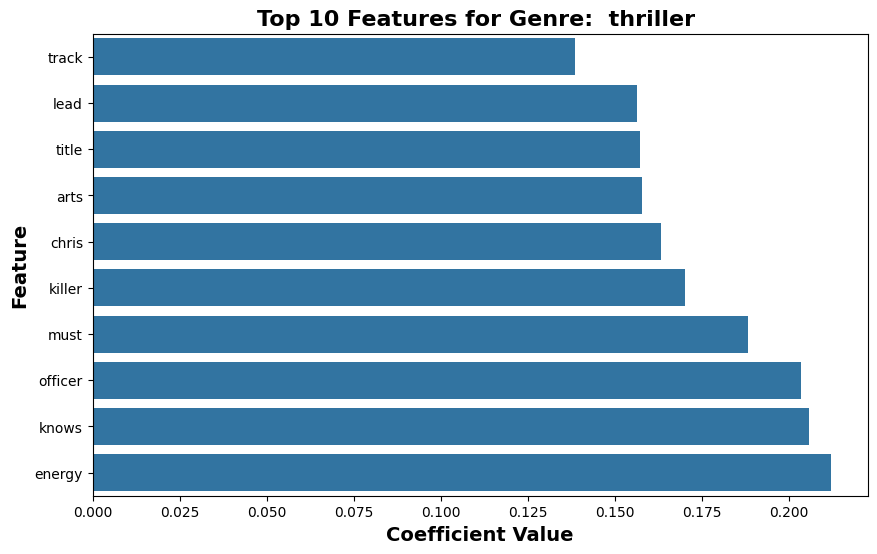

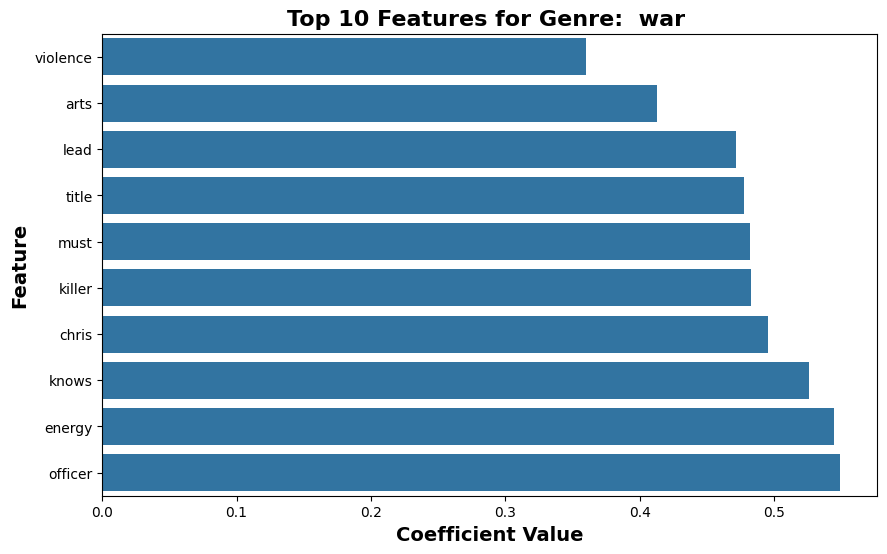

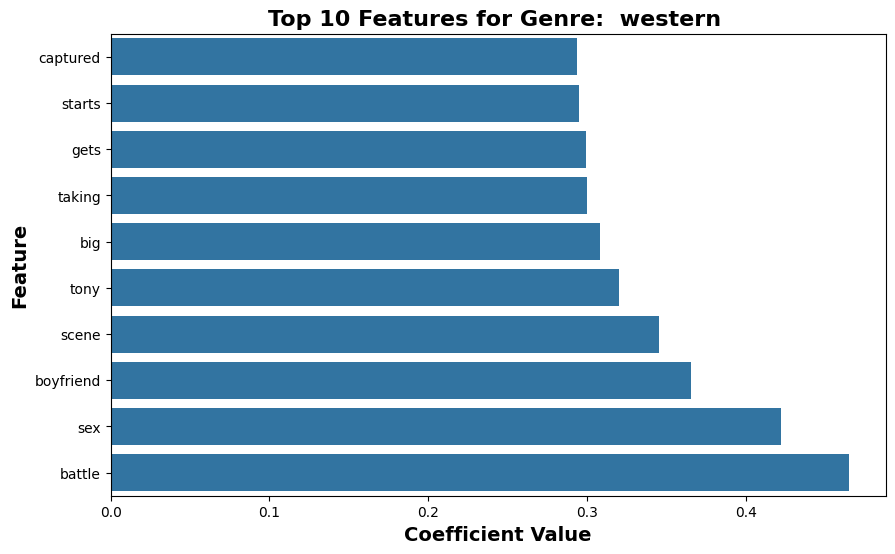

Predicted Genre for sample description:  drama 


In [ ]:
# Install necessary packages
!pip install nltk matplotlib seaborn wordcloud scikit-learn

import numpy as np
import pandas as pd
import re  # used for pattern matching and text manipulation
import string
import nltk # a powerful library for working with human language data
from nltk.corpus import stopwords # for cleaning
from nltk.stem import LancasterStemmer # for cleaning
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from sklearn.manifold import TSNE
from multiprocessing import Pool

# Download the necessary NLTK data
nltk.download('stopwords')
nltk.download('punkt')

# Initialize the stemmer and stop words
stemmer = LancasterStemmer()
stop_words = set(stopwords.words('english'))

# Define the clean_text function
def clean_text(text):
    text = text.lower()  # Lowercase all characters
    text = re.sub(r'@\S+', '', text)  # Remove Twitter handles
    text = re.sub(r'http\S+', '', text)  # Remove URLs
    text = re.sub(r'pic.\S+', '', text)  # Remove picture URLs
    text = re.sub(r"[^a-zA-Z+']", ' ', text)  # Keep only characters
    text = re.sub(r'\s+[a-zA-Z]\s+', ' ', text + ' ')  # Keep words with length > 1 only
    text = "".join([i for i in text if i not in string.punctuation])
    words = nltk.word_tokenize(text)
    text = " ".join([i for i in words if i not in stop_words and len(i) > 2])
    text = re.sub("\s[\s]+", " ", text).strip()  # Remove repeated/leading/trailing spaces
    return text

# Load the training data
train_path = "train_data.txt"
train_data = pd.read_csv(train_path, sep=":::", names=["TITLE", "GENRE", "DESCRIPTION"], engine="python")

# Apply the clean_text function to the 'DESCRIPTION' column in the training data
with Pool() as pool:
    train_data['Text_cleaning'] = pool.map(clean_text, train_data['DESCRIPTION'])

# Plot the distribution of genres in the training data using a count plot
plt.figure(figsize=(14, 7))
sns.countplot(data=train_data, y='GENRE', order=train_data['GENRE'].value_counts().index, palette='viridis')
plt.xlabel('Count', fontsize=14, fontweight='bold')
plt.ylabel('Genre', fontsize=14, fontweight='bold')
plt.title('Distribution of Genres (Count Plot)', fontsize=16, fontweight='bold')
plt.show()

# Plot the distribution of genres using a bar plot
plt.figure(figsize=(14, 7))
counts = train_data['GENRE'].value_counts()
sns.barplot(x=counts.index, y=counts, palette='viridis')
plt.xlabel('Genre', fontsize=14, fontweight='bold')
plt.ylabel('Count', fontsize=14, fontweight='bold')
plt.title('Distribution of Genres (Bar Plot)', fontsize=16, fontweight='bold')
plt.xticks(rotation=90, fontsize=12, fontweight='bold')
plt.show()

# Generate word clouds for each genre
genres = train_data['GENRE'].unique()
plt.figure(figsize=(20, 30))

for i, genre in enumerate(genres):
    genre_data = train_data[train_data['GENRE'] == genre]
    text = ' '.join(genre_data['Text_cleaning'])
    wordcloud = WordCloud(width=800, height=400, max_words=100).generate(text)

    plt.subplot(len(genres), 1, i+1)
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f'Word Cloud for {genre}', fontsize=16, fontweight='bold')
    plt.axis('off')

plt.show()

# Use a smaller subset for initial testing
train_data_subset = train_data.sample(frac=0.1, random_state=42)

# Vectorize the text data using TF-IDF with a limited number of features
vectorizer = TfidfVectorizer(max_features=1000)
X = vectorizer.fit_transform(train_data_subset['Text_cleaning'])
y = train_data_subset['GENRE']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train an SVM model
model = SVC(kernel='linear')
model.fit(X_train, y_train)

# Predict the genres of the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')
print(classification_report(y_test, y_pred))

# Plot confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=model.classes_, yticklabels=model.classes_)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# t-SNE visualization of TF-IDF vectors
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X_train.toarray())

plt.figure(figsize=(14, 10))
sns.scatterplot(x=X_tsne[:, 0], y=X_tsne[:, 1], hue=y_train, palette='viridis', legend='full')
plt.title('t-SNE Visualization of TF-IDF Vectors', fontsize=16, fontweight='bold')
plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')
plt.legend(title='Genre', loc='best')
plt.show()

# Feature importance plot (for linear SVM)
coefficients = model.coef_.toarray()
features = vectorizer.get_feature_names_out()

for i, genre in enumerate(model.classes_):
    top10 = np.argsort(coefficients[i])[-10:]
    plt.figure(figsize=(10, 6))
    sns.barplot(x=coefficients[i][top10], y=[features[j] for j in top10])
    plt.title(f'Top 10 Features for Genre: {genre}', fontsize=16, fontweight='bold')
    plt.xlabel('Coefficient Value', fontsize=14, fontweight='bold')
    plt.ylabel('Feature', fontsize=14, fontweight='bold')
    plt.show()

# Sample prediction (optional)
sample_description = ["A young wizard discovers his magical heritage."]
sample_description_cleaned = [clean_text(sample_description[0])]
sample_description_tfidf = vectorizer.transform(sample_description_cleaned)
predicted_genre = model.predict(sample_description_tfidf)
print(f'Predicted Genre for sample description: {predicted_genre[0]}')